In [1]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/wine_csv_cata.csv')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [2]:
# 결정트리 적용

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42)
tree.fit(X_train,y_train)
tree.score(X_train,y_train), tree.score(X_test,y_test)

(0.9973316912972086, 0.8498461538461538)

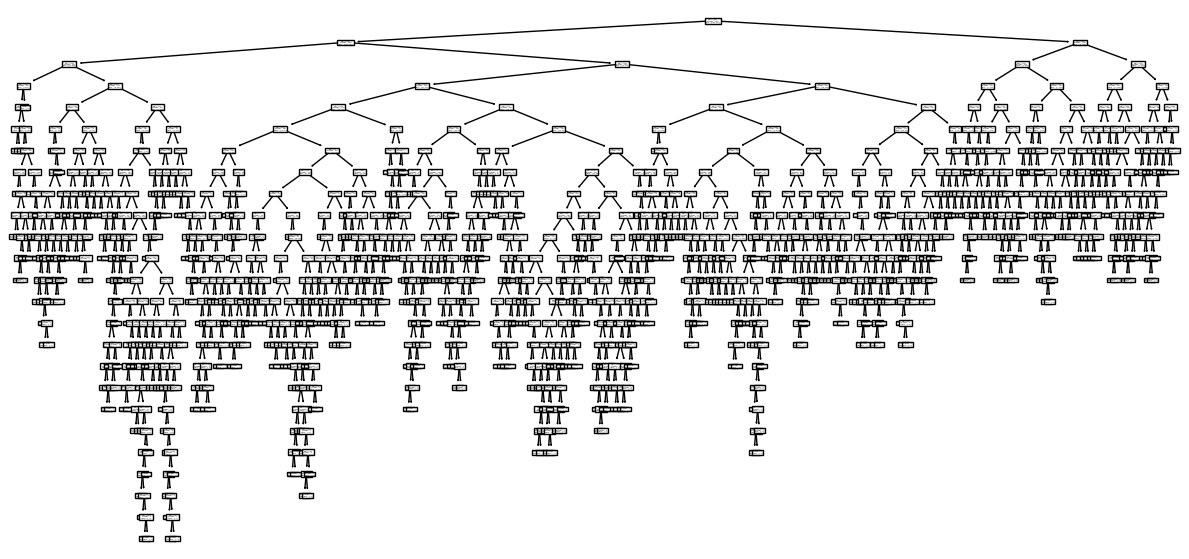

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(tree,feature_names=wine.columns)
plt.show()

In [5]:
# 가지치기 - max_depth 조정
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train), tree.score(X_test,y_test))

0.8499589490968801 0.8363076923076923


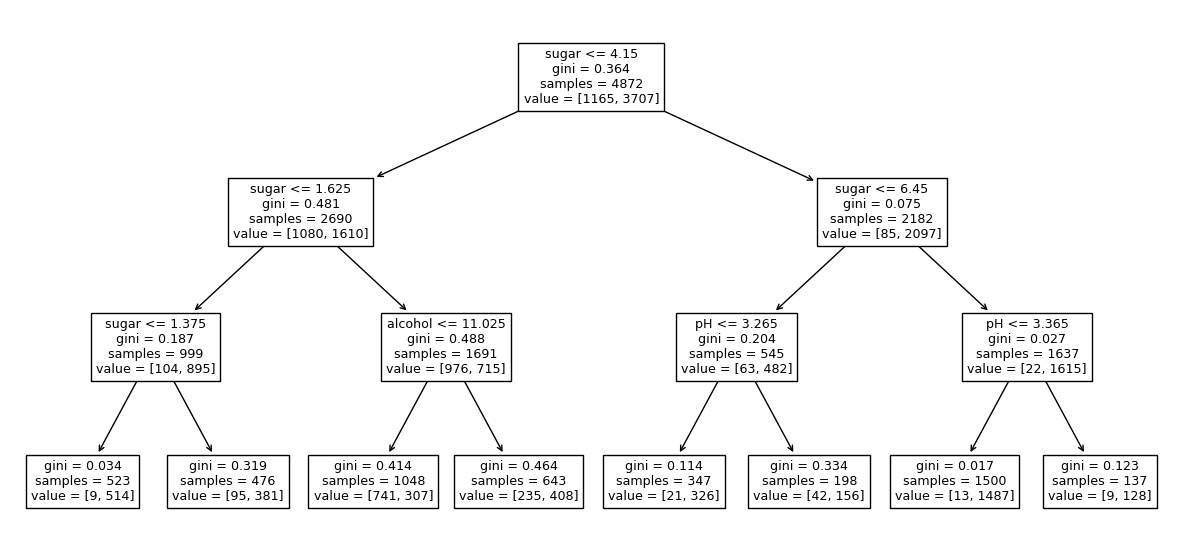

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(tree,feature_names=wine.columns)
plt.show()

교차검증
  - 주어진 데이터를 일정 비율로 학습용과 검증용으로 나눠서 한번만 사용하는게 아니라 비율은 유지하되 데이터를 자르는 위치를 변경하면서 사용한다.

  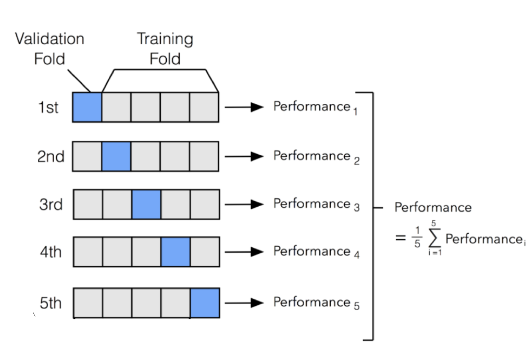

In [7]:
from sklearn.model_selection import cross_validate
scores =  cross_validate(tree,X_train,y_train)
print(scores)

{'fit_time': array([0.01101995, 0.00680041, 0.00683451, 0.00711083, 0.00748181]), 'score_time': array([0.00362659, 0.00343966, 0.00353456, 0.00361538, 0.00393009]), 'test_score': array([0.82974359, 0.84      , 0.84086242, 0.84188912, 0.85215606])}


In [8]:
import numpy as np
np.mean( scores['test_score'] )

0.8409302374559047

In [10]:
# 클래스의 비율을 유지하면서 교차검증
from sklearn.model_selection import StratifiedKFold
scores =  cross_validate(tree,X_train,y_train, cv=StratifiedKFold())
print(scores)
print(np.mean( scores['test_score'] ))

{'fit_time': array([0.00844622, 0.00694394, 0.0070529 , 0.00788999, 0.00943756]), 'score_time': array([0.00436687, 0.00395322, 0.00437617, 0.00427985, 0.00419497]), 'test_score': array([0.82974359, 0.84      , 0.84086242, 0.84188912, 0.85215606])}
0.8409302374559047


In [12]:
# 교차검증할때 10폴드로 변경하는 분류기를 정의한다
splitter =  StratifiedKFold(n_splits = 10,shuffle=True,random_state=42)
scores =  cross_validate(tree,X_train,y_train, cv=splitter)
print(scores)
print(np.mean( scores['test_score'] ))

{'fit_time': array([0.01320028, 0.00776243, 0.00761533, 0.00730538, 0.00726581,
       0.00785708, 0.00713634, 0.00720906, 0.00746799, 0.00757742]), 'score_time': array([0.00400019, 0.00372505, 0.00379324, 0.00363207, 0.00375915,
       0.00337338, 0.00377941, 0.00372744, 0.00365281, 0.00378394]), 'test_score': array([0.87295082, 0.81147541, 0.85831622, 0.8275154 , 0.87268994,
       0.85831622, 0.85626283, 0.81314168, 0.83983573, 0.82546201])}
0.8435966270575959


하이퍼 파라메터 튜닝

In [13]:
# min_impurity_decrease : 이 값이 설정되면 작은 불순도감소가 있는노드는 분할하지 않는다 즉 이값(임계값)보다 큰 경우만 트리가 내려감
min_impurity_decrease  = [0.0001,0.0002,0.0003,0.0004,0.0005]
tree = DecisionTreeClassifier(random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : min_impurity_decrease }
gs = GridSearchCV(tree,param_grid=params,n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [15]:
gs.best_params_

{'min_impurity_decrease': 0.0003}

In [16]:
best_model = gs.best_estimator_

In [18]:
best_model.score(X_train,y_train), best_model.score(X_test,y_test)

(0.9137931034482759, 0.8670769230769231)

In [19]:
#  아래의 파라메터를 가지고 최상의 파라메터값-->하이퍼파라메터 튜닝
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [20]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, n_jobs=-1)
gs.fit(X_train,y_train)
gs.best_params_

{'max_depth': 15, 'min_impurity_decrease': 0.0001, 'min_samples_split': 22}

In [21]:
best_model = gs.best_estimator_
best_model.score(X_train,y_train), best_model.score(X_test,y_test)

(0.9164614121510674, 0.8566153846153847)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=params, n_jobs=-1,n_iter = 100)
gs.fit(X_train,y_train)
gs.best_params_

{'min_samples_split': 2,
 'min_impurity_decrease': 0.00030000000000000003,
 'max_depth': 16}

In [24]:
best_model = gs.best_estimator_
best_model.score(X_train,y_train), best_model.score(X_test,y_test)

(0.9137931034482759, 0.8670769230769231)